<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.


# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (breast-cancer-wisconsin-data-old.csv)
- Perform some basic structural cleaning to facilitate the work

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
bc = pd.read_csv(r'C:\Users\ryant\Desktop\IOD\DATA\breast-cancer-wisconsin-data-old.csv', index_col = 0)
bc.sample(5)

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,,,
1227481,10,5,7,4,4,10,8,9,1,4
608157,10,4,3,10,4,10,10,1,1,4
709287,6,8,7,8,6,8,8,9,1,4
1123061,6,10,2,8,10,2,7,8,10,4
486662,2,1,1,2,2,1,3,1,1,2


In [102]:
bc.shape

(699, 10)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [104]:
bc['Bare_Nuclei'].value_counts()

Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [106]:
bc[bc['Bare_Nuclei'] == '?'] 

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,,,
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2


In [108]:
bc.replace('?', np.nan, inplace=True) #convert the ? to nan and coerce to a float.
bc['Bare_Nuclei'] = pd.to_numeric(bc['Bare_Nuclei'], errors='coerce')

In [110]:
bc['Bare_Nuclei'].fillna(bc['Bare_Nuclei'].mean().round(0), inplace=True) #convering null values to the mean of Bare_nuclei rounded

In [112]:
bc['Bare_Nuclei'].value_counts() #

Bare_Nuclei
1.0     402
10.0    132
4.0      35
2.0      30
5.0      30
3.0      28
8.0      21
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [114]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Cell_Size_Uniformity         699 non-null    int64  
 2   Cell_Shape_Uniformity        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  699 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [116]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size_Uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape_Uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,699.0,3.555079,3.602496,1.0,1.0,1.0,5.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [118]:
corr = bc.drop(columns=['Class']).corr()

In [120]:
mask = np.triu(np.ones_like(corr, dtype=bool))

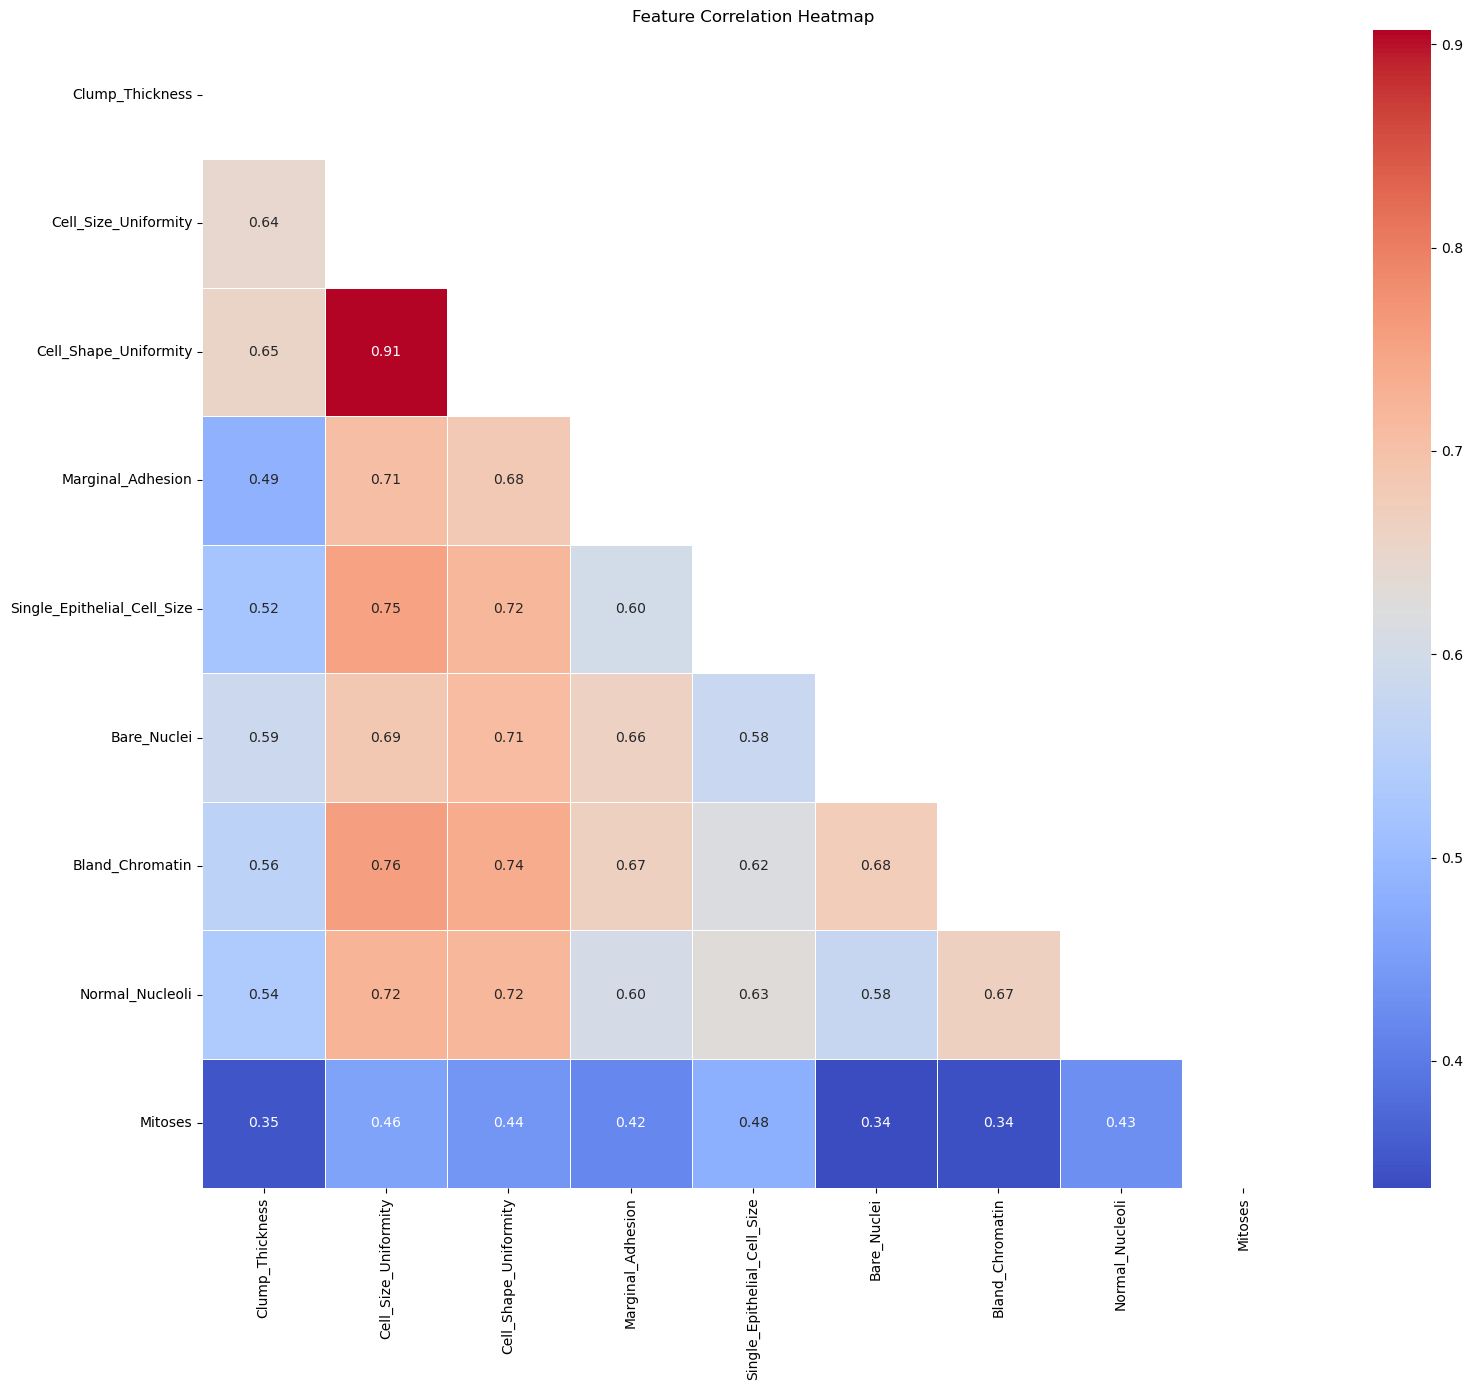

In [122]:
plt.figure(figsize=(16, 14))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, mask=mask, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
  <br>'Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses' 
- Is there an output variable (label)?
  <br> Yes
- If there is an output variable:
    - What is it? Class
    - What is its type? Integer
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
bc.columns

Index(['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [128]:
features = ['Clump_Thickness', 'Cell_Size_Uniformity', 'Cell_Shape_Uniformity',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses' ]
target = 'Class'

In [130]:
X = bc[features]
y = bc[target]

In [132]:
X_train, X_test, y_train, y_test = train_test_split( X , y,
                                                    test_size = 0.2 , 
                                                    random_state = 87,
                                                    stratify = y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [134]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [138]:
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=5),
    n_estimators=50,
    learning_rate=1.0,
    random_state=722,
    algorithm='SAMME.R'
)

In [140]:
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_leaf=5),
                   random_state=722)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc

In [144]:
cross_val_score(boosting_model, X, y, cv=5)

array([0.92857143, 0.93571429, 0.97857143, 0.98571429, 0.94964029])

In [148]:
y_train_pred = boosting_model.predict(X_train)

In [151]:
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Detailed report
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))

#ROC AUC
print("AUC score (Train):\n", roc_auc_score(y_train, y_train_pred))

Training Accuracy: 1.0

Classification Report (Train):
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       366
           4       1.00      1.00      1.00       193

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559

Confusion Matrix (Train):
 [[366   0]
 [  0 193]]
AUC score (Train):
 1.0


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [154]:
y_test_pred = boosting_model.predict(X_test)

In [157]:
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", train_acc)

# Detailed report
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))

#ROC AUC
print("AUC score (Test):\n", roc_auc_score(y_test, y_test_pred))

Test Accuracy: 1.0

Classification Report (Test):
               precision    recall  f1-score   support

           2       0.96      0.93      0.95        92
           4       0.88      0.92      0.90        48

    accuracy                           0.93       140
   macro avg       0.92      0.93      0.92       140
weighted avg       0.93      0.93      0.93       140

Confusion Matrix (Test):
 [[86  6]
 [ 4 44]]
AUC score (Test):
 0.9257246376811593


# 
Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [163]:
y_pred = boosting_model.predict(X_test)

In [166]:
features

['Clump_Thickness',
 'Cell_Size_Uniformity',
 'Cell_Shape_Uniformity',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [169]:
newdata = X_test[43:44]
newdata

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Sample_number,,,,,,,,,
1056784,3,1,1,1,2,1.0,2,1,1


In [174]:
prediction = boosting_model.predict(newdata)[0]
prediction

2

In [177]:
label_map = {2: 'Benign', 4: 'Malignant'}
predicted_label = label_map[prediction]

print(f"Predicted Class: {prediction} ({predicted_label})")

Predicted Class: 2 (Benign)


In [180]:
y_test[43:44]

Sample_number
1056784    2
Name: Class, dtype: int64



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



